In [1]:
import numpy as np

class K_Means:
    pass

    def __init__(self,k):
        pass
        """把样本划分为k类"""
        self._k = k


    def fit(self,X):
        pass
        self.centroid,self.samles_class = self._kmeans(X,self._k)

    def _kmeans(self,X,k):
        pass
        """"采用的是欧式距离的平方作为样本间的距离"""
        n_samples,n_features = X.shape
        #初始化，随机选择k个样本点作为初始聚类中心
        random_idx = np.random.randint(n_samples,size=k)
        centroid = np.copy(X[random_idx])
        #用来记录样本分类到哪一个类
        #第一列存储分配到哪一个类，第二列存储距离
        sample_class = np.zeros((n_samples,2))
        #用来记录样本的划分结果在两次不同的迭代中是否发生了改变
        ischanged = True
        while ischanged:
            ischanged = False
            #对样本进行聚类，计算每个样本点到类中心的距离
            for i in range(n_samples):
                #记录样本点到质心的最短距离
                min_dist = np.inf
                #记录样本点到各个质心的最小距离的质心的索引
                min_dist_idx = None
                for idx in range(k):
                    #计算样本点到每个质心的距离
                    dist = np.linalg.norm(X[i]-centroid[idx],ord=2)**2
                    if dist < min_dist:
                        min_dist = dist
                        min_dist_idx = idx

                if sample_class[i,0] != min_dist_idx:
                    ischanged = True
                    #把样本点指派到与其最近的中心的类
                    sample_class[i,0] = min_dist_idx
                #分类没改变，但是因为每一轮会更新一下质心，所以距离可能会发生改变
                sample_class[i,1] = min_dist

            #一轮迭代完成后，计算新的类中心
            for c_idx in range(k):
                x_c = X[np.argwhere( sample_class[:,0] == c_idx ).ravel()]
                if x_c.shape[0] == 0 :
                    centroid[c_idx] = X[np.random.randint(n_samples,size=1)]
                    continue
                centroid[c_idx] = np.mean(x_c,axis=0)

        #保存最后获得的质心，分类结果
        return centroid,sample_class

    def predict(self,x):
        pass


class biKMeans(K_Means):
    pass
    """为了解决局部最小值问题，提出的二分K-Means聚类算法"""


    def fit(self,X):
        pass
        self.centroid,self.samles_class = self.biKMeans(X,self._k)

    def biKMeans(self,X,k):
        pass
        n_samles = X.shape[0]
        sample_class = np.zeros(shape=(n_samles,2))

        #初始化只有一个质心，且质心为所有样本的均值
        centroid_0 = np.mean(X,axis=0).tolist()
        #初始化质心列表
        centList = [centroid_0]
        #计算所有数据点到初始质心的距离
        for i in range(n_samles):
            sample_class[i,1] = np.linalg.norm(X[i] - centroid_0,ord=2)**2

        while len(centList) < k: #当质心的数量小于k时
            min_SSE = np.inf
            #对每个质心
            for i in range(len(centList)):
                #属于当前类的样本点
                curr_class_samples = X[np.argwhere(sample_class[:,0]==i).ravel()]

                #将属于当前类的样本继续进行二分kmeans处理
                cent_list,split_class_samples = self._kmeans(curr_class_samples,2)
                split_sse = np.sum(split_class_samples[:,1])
                #未参与划分的样本点
                not_split_samples = sample_class[np.argwhere(sample_class[:,0] != i).ravel()]
                not_split_sse = np.sum(not_split_samples[:,1])

                if (split_sse + not_split_sse) < min_SSE:
                    best_centroid = i
                    best_cent_list = cent_list
                    best_split_class_samples = split_class_samples.copy()
                    min_SSE = split_sse + not_split_sse

            #找到最好的分配结果
            #等于1的是在二分过程中分配给了第二个簇的样本点，把它分给新的一个簇
            best_split_class_samples[np.argwhere(best_split_class_samples[:,0] == 1).ravel(),0] = len(centList)
            #把这轮进行了划分为0的样本保留分配在原来的簇里面
            best_split_class_samples[np.argwhere(best_split_class_samples[:,0] == 0).ravel(),0] = best_centroid

            #更新质心列表
            #原来的质心更新为二分的质心的第一个
            centList[best_centroid] = best_cent_list.tolist()[0]
            #把二分质心的第二个添加进来
            centList.append(best_cent_list.tolist()[1])
            #更新总的分配结果，把原来用来划分的那个簇的分配情况和样本距离进行更新
            sample_class[np.argwhere(sample_class[:,0] == best_centroid).ravel()] = best_split_class_samples

        return np.mat(centList),sample_class




(4, 2)


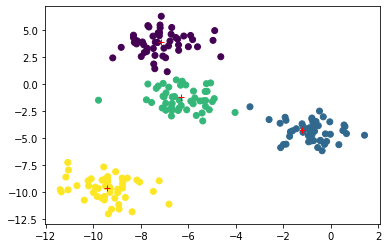

In [2]:
from sklearn.datasets import make_blobs

from matplotlib import pyplot as plt

X,y = make_blobs(centers=4,n_samples=200)

#km = K_Means(k=4)
km = biKMeans(k=4)
km.fit(X)
centroid = km.centroid
print(centroid.shape)
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(centroid[:,0],centroid[:,1],'+r')
plt.show()
